In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

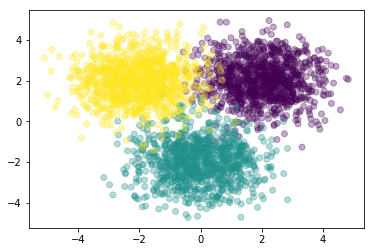

In [3]:
D = 2
K = 3
N = int(K*1e3)

X0 = np.random.randn((N//K),D) + np.array([2,2])
X1 = np.random.randn((N//K),D) + np.array([0,-2])
X2 = np.random.randn((N//K),D) + np.array([-2,2])
X = np.vstack((X0,X1,X2))

y = np.array([0]*(N//K) + [1]*(N//K) + [2]*(N//K))

plt.figure()
plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.3333)

In [9]:
def one_hot_encode(y):
    N = len(y)
    K = len(set(y))
    
    Y = np.zeros((N,K))
    
    for i in range(N):
        Y[i,y[i]] = 1
        
    return Y

def shuffle(*args):
    idx = np.random.permutation(len(args[0]))
    return [X[idx] for X in args]

def ReLU(H):
    return H*(H > 0)

def softmax(H):
    eH = np.exp(H)
    return eH/eH.sum(axis = 1, keepdims = True)

def feed_forward(X,W1,b1,W2,b2):
    Z1 = ReLU(np.matmul(X,W1) + b1)
    P_hat = softmax(np.matmul(Z1,W2) + b2)
    return Z1, P_hat
    
def cross_entropy(Y, P_hat):
    return -np.sum(Y*np.log(P_hat))

def accuracy(y, y_hat):
    return np.mean(y == y_hat)

In [7]:
Y = one_hot_encode(y)

In [19]:
M = 4

W1 = np.random.randn(D,M)
b1 = np.random.randn(M)
W2 = np.random.randn(M,K)
b2 = np.random.randn(K)

Accuracy: 0.9647


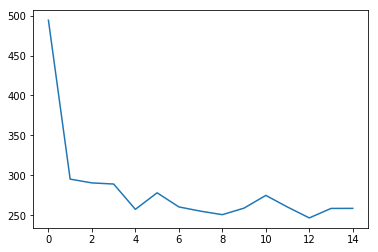

In [20]:
eta0 = 3e-1
epsilon = 1e-10

GW1 = 1
Gb1 = 1
GW2 = 1
Gb2 = 1

epochs = 5

batch_sz = 100
batches = N//batch_sz

check = 10
t = 0

J = []

for epoch in range(epochs):
    X,Y,y = shuffle(X,Y,y)
    
    for batch in range(batches):
        X_b = X[(batch*batch_sz):((batch + 1)*batch_sz),:]
        Y_b = Y[(batch*batch_sz):((batch + 1)*batch_sz),:]
        
        t += 1
        
        Z1_b, P_hat_b = feed_forward(X_b,W1,b1,W2,b2)
        
        dH2 = P_hat_b - Y_b
        dW2 = np.matmul(Z1_b.T,dH2)
        db2 = dH2.sum(axis = 0)
        GW2 += dW2*dW2
        Gb2 += db2*db2
        W2 -= (eta0/np.sqrt(GW2 + epsilon))*dW2
        b2 -= (eta0/np.sqrt(Gb2 + epsilon))*db2
        
        dZ1 = np.matmul(dH2,W2.T)
        dH1 = dZ1*(Z1_b > 0)
        dW1 = np.matmul(X_b.T,dH1)
        db1 = dH1.sum(axis = 0)
        GW1 += dW1*dW1
        Gb1 += db1*db1
        W1 -= (eta0/np.sqrt(GW1 + epsilon))*dW1
        b1 -= (eta0/np.sqrt(Gb1 + epsilon))*db1
        
        if t % check == 0:
            P_hat = feed_forward(X,W1,b1,W2,b2)[-1]
            J.append(cross_entropy(Y,P_hat))
            
plt.figure()
plt.plot(J)

P_hat = feed_forward(X,W1,b1,W2,b2)[-1]
y_hat = P_hat.argmax(axis = 1)

print("Accuracy: {:0.4f}".format(accuracy(y,y_hat)))